In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [60]:
data = {
    "kvadrat_metr":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
    "narxi_$":[849, 1078, 1927, 2098, 3849, 3949, 4490, 4021, 4735, 5543]
}
df = pd.DataFrame(data)

In [61]:
df

,kvadrat_metr,narxi_$
0,1,849
1,2,1078
2,3,1927
3,4,2098
4,5,3849
5,6,3949
6,7,4490
7,8,4021
8,9,4735
9,10,5543


In [62]:
X = df[["kvadrat_metr"]]
y = df["narxi_$"]

In [63]:
X

,kvadrat_metr
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [64]:
y

0     849
1    1078
2    1927
3    2098
4    3849
5    3949
6    4490
7    4021
8    4735
9    5543
Name: narxi_$, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [66]:
X_train

,kvadrat_metr
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [67]:
y_train

5    3949
0     849
7    4021
2    1927
9    5543
4    3849
3    2098
6    4490
Name: narxi_$, dtype: int64

In [68]:
lr_model = LinearRegression()

In [69]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [70]:
weight = lr_model.coef_[0]
bias = lr_model.intercept_

In [71]:
print("Og'irlik:",weight)
print("bias:",bias)

Og'irlik: 517.1724137931035
bias: 496.3017241379307


In [72]:
LR_y=weight*X+bias

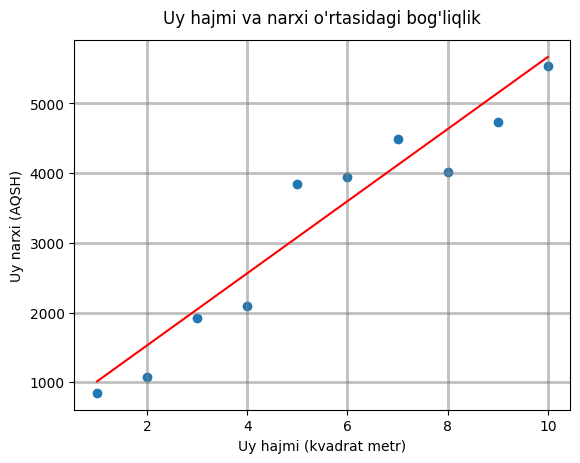

In [73]:
plt.scatter(X,y)
plt.plot(X,LR_y,c='r')
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik", size = 12, pad=12)
plt.xlabel("Uy hajmi (kvadrat metr)")
plt.ylabel("Uy narxi (AQSH)")
plt.grid(ls = '-', lw = 2, c = 'grey', alpha = 0.5)
plt.show()

In [74]:
bashorat = lr_model.predict(X_test)
print(bashorat)

[5150.85344828 1530.64655172]


In [75]:
y_test

8    4735
1    1078
Name: narxi_$, dtype: int64

In [76]:
xato = y_test - bashorat
print(xato)

8   -415.853448
1   -452.646552
Name: narxi_$, dtype: float64


In [77]:
my_grade = lr_model.predict([[9]])
print(my_grade)

[5150.85344828]


C:\Users\Sevinch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
y_pred = lrmodel.predict(X_test)
y_pred

array([5150.85344828, 1530.64655172])

In [79]:
y_test

8    4735
1    1078
Name: narxi_$, dtype: int64

In [80]:
print("Intercept (Beta_0):", lrmodel.intercept_)
print("Slope (Beta_1):", lrmodel.coef_[0])

Intercept (Beta_0): 496.3017241379307
Slope (Beta_1): 517.1724137931035


In [81]:
natija = pd.DataFrame({"Xaqiqiy": y_test, "Bashorat": y_pred})
natija

,Xaqiqiy,Bashorat
8,4735,5150.853448
1,1078,1530.646552


In [82]:
mae = mean_absolute_error(y_test, y_pred)
print("O'rtacha absalyut xato (MSE):", mae)

O'rtacha absalyut xato (MSE): 434.25


In [83]:
# O'rtacha kvadratik xato (MSE) va R-kvadratni hisoblash
mse = mean_squared_error(y_test, y_pred)
print("O'rtacha kvadratik xato (MSE):", mse)

O'rtacha kvadratik xato (MSE): 188911.49561533885


In [84]:
rmse = pow(mse, 1/2)
rmse

434.6395007536002

In [85]:
r2 = r2_score(y_test, y_pred)
print("R-kvadrat (R^2):", r2)

R-kvadrat (R^2): 0.9434973968240563


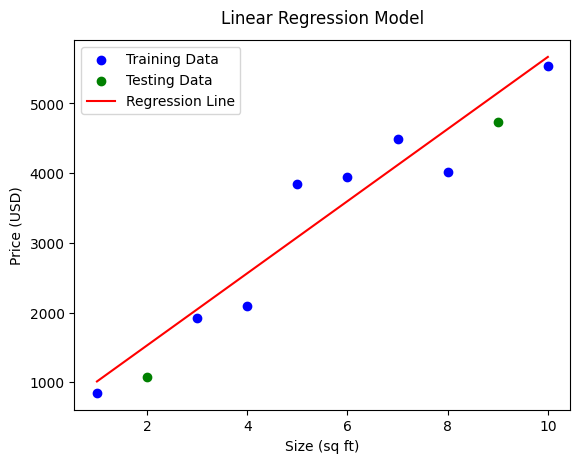

In [86]:
# Plot training data and regression line
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(X, lrmodel.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression Model", pad = 12)
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()